In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Just a mini project, the goal is to predict the survival of passengers based on the given datasets.**
* The dataset is downloaded from Kaggle and stored in my Google Drive.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Column Descriptions:
* Pclass: Ticket classes where 1, 2 & 3 = 1st, 2nd and 3rd class respectively<br>
* SibSp: Number of siblings / spouses aboard the Titanic<br>
* Parch: Number of parents / children aboard the Titanic<br>
* Embarked: Port of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
print(df.shape, "\n")
df.info()

(891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Checking the missing values**
*   As we can see the Age, Cabin and Embarked columns have missing values, the proportion of Age column is likely can be replaced by the form of imputation, for instance the mean values based on the characteristic of the other column.
*   However the Cabin column has too much of the missing values, I will probably drop this column.
*   In fact, there are only 2 missing values on Embarked column, we can simply drop these 2 rows.





PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

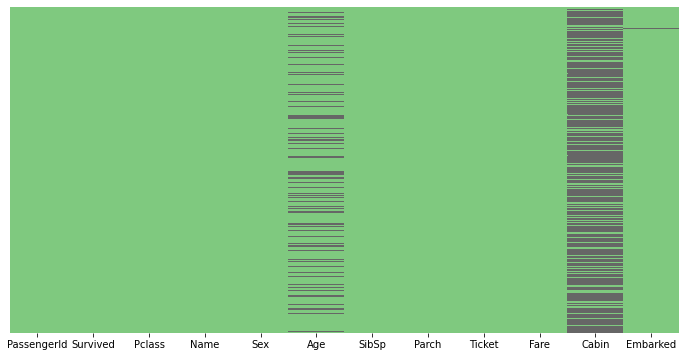

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isna(), cbar = False, yticklabels = False, cmap = "Accent")
df.isna().sum()

## **Simple Exploratory Data Analysis**

* Survivors by age

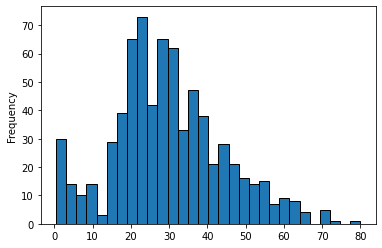

In [ ]:
df["Age"].plot.hist(bins = 30, ec = "k")
plt.show()

* Survivors by gender

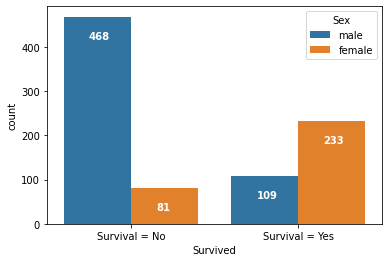

In [ ]:
fig, ax = plt.subplots()

sns.countplot(x = "Survived", data = df, hue = "Sex", ax = ax)

for v in ax.patches:
        ax.annotate('{:.0f}'.format(v.get_height()), (v.get_x() +0.15, v.get_height() -50),
                    color = "w", weight = "bold")

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Survival = No"; labels[1] = "Survival = Yes"
ax.set_xticklabels(labels)
plt.show()

* Survival by Pclass (Ticket class = 1st, 2nd & 3rd class)

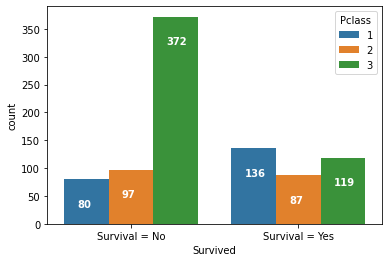

In [ ]:
fig, ax = plt.subplots()

sns.countplot(x = "Survived", data = df, hue = "Pclass", ax = ax)

for v in ax.patches:
        ax.annotate("{:.0f}".format(v.get_height()), (v.get_x() +0.08, v.get_height() -50),
                    color = "w", weight = "bold")

fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Survival = No"; labels[1] = "Survival = Yes"
ax.set_xticklabels(labels)
plt.show()

## **Data Cleaning**
* Try to see if we can insert the missing value in the Age column based on their ticket classes.

In [ ]:
df["Age"].isna().sum()

177

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

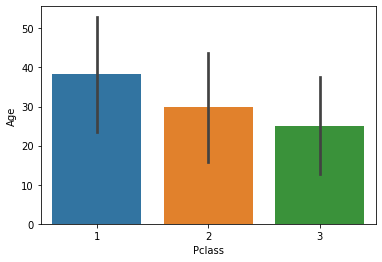

In [ ]:
sns.barplot(x = "Pclass", y = "Age", data = df, ci = "sd")

df.groupby("Pclass").mean()["Age"]

* Then we can use a simple def function to insert the average age to those missing values in the Age column.

In [ ]:
def impute_age_by_class(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isna(age):
        
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    
    else:
        return age
    

df["Age"] = df[["Age", "Pclass"]].apply(impute_age_by_class, axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Then check again the missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

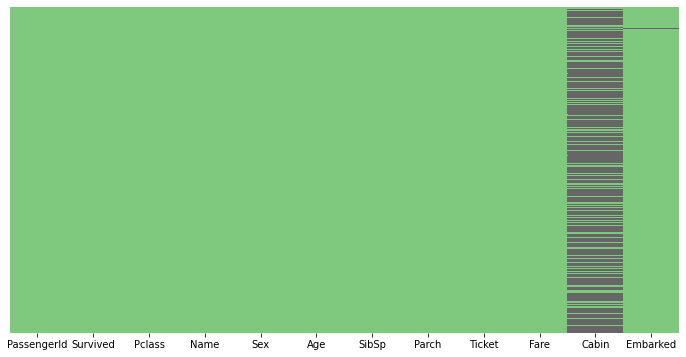

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isna(), cbar = False, yticklabels = False, cmap = "Accent")
df.isna().sum()

* As there are too much of the missing values in Cabin column, almost 80% of the values are NaNs, so I decided to drop this column.
* Also, the PassengerId, Ticket and Name columns won't contribute much to the Machine Learning, I decided to drop these 3 columns as well.

In [ ]:
df.drop(["Cabin", "PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* Check again the missing values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

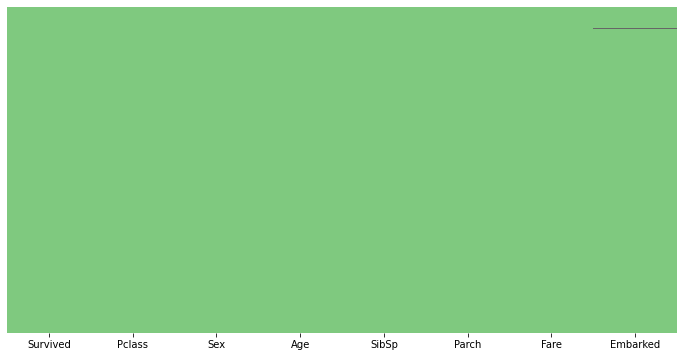

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isna(), cbar = False, yticklabels = False, cmap = "Accent")
df.isna().sum()

* Now let's see if we can find which column has the highest correlation to the Embarked column. And then we can group the DataFrame by that highest correlation to the Emabrked column, and then calculate the mean value to fill the 2 missing values. 
* Because .corr() method takes only numeric numbers, so we convert the Embark to numeric.

In [ ]:
df["Embarked"].value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [ ]:
embark_encoder = lambda x: 0 if x == "C" else 1 if x == "Q" else 2 if x == "S" else np.nan

df["Embarked"] = df["Embarked"].apply(embark_encoder)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

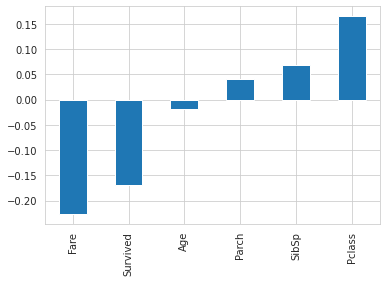

In [ ]:
df.corr()["Embarked"].sort_values().drop("Embarked").plot(kind = "bar")
sns.set_style("whitegrid")

* Now I have 2 options:
* 1st - Drop this two rows since it only has 2 two NaN values as 2 rows of values won't affect much.
* 2nd - Or go ahead just find the mean value to fill these 2 NaN values in Embarked column.
* Since I've already came to this stage, I decided to proceed to find the mean values for this 2 NaN values eventhough Pclass only has 15% of the correlation to the Embarked column.

In [ ]:
row_has_nan = df.isna().any(axis = 1)
df[row_has_nan]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
print(df.groupby("Pclass")["Embarked"].mean())

Pclass_mean = round(df.groupby("Pclass")["Embarked"].mean(), 0)
Pclass_mean

Pclass
1    1.194444
2    1.798913
3    1.584521
Name: Embarked, dtype: float64


Pclass
1    1.0
2    2.0
3    2.0
Name: Embarked, dtype: float64

In [ ]:
def fill_embarked(classes, embarks):
  return Pclass_mean[classes] if np.isnan(embarks) else embarks

df["Embarked"] = df.apply(lambda x: fill_embarked(x["Pclass"], x["Embarked"]), axis = 1)

In [ ]:
df.iloc[[61, 829]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,1.0
829,1,1,female,62.0,0,0,80.0,1.0


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

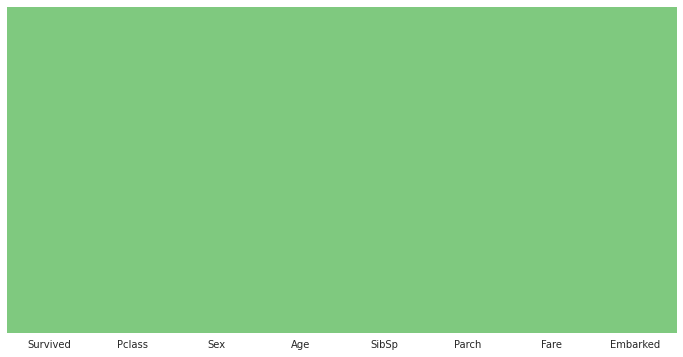

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isna(), cbar = False, yticklabels = False, cmap = "Accent")
df.isna().sum()

## **Pre-Processing for Machine Learning**
* In order to do Machine Learning, we need our features in numerical.

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

* Convert the male and female to numeric.

In [ ]:
from sklearn import preprocessing

df["Sex"] = preprocessing.LabelEncoder().fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


* Train our data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 88)

* Use Decision Tree for the classification on survivors.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)


pred = dtree.predict(X_test)


print("Confusion Matrix:", "\n", confusion_matrix(y_test, pred), "\n")
print("Accuracy Score:", dtree.score(X_test, y_test), "\n")
print("Classification Report:", "\n"*2, classification_report(y_test, pred))

Confusion Matrix: 
 [[116  29]
 [ 29  49]] 

Accuracy Score: 0.7399103139013453 

Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       145
           1       0.63      0.63      0.63        78

    accuracy                           0.74       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.74      0.74      0.74       223



* The accuracy is not that high with only 76%, let's try if we can improve the accuracy by adjusting the parameters of our Tree.
* Adjust the criterion to entropy wit max depth, by default max_depth is None which means it will expand to its maximum, and we can give it a name as "Full Tree"

In [ ]:
full_tree = DecisionTreeClassifier(criterion = "entropy")

full_tree.fit(X_train, y_train)

print("Depth of Tree:", full_tree.tree_.max_depth)

Depth of Tree: 20


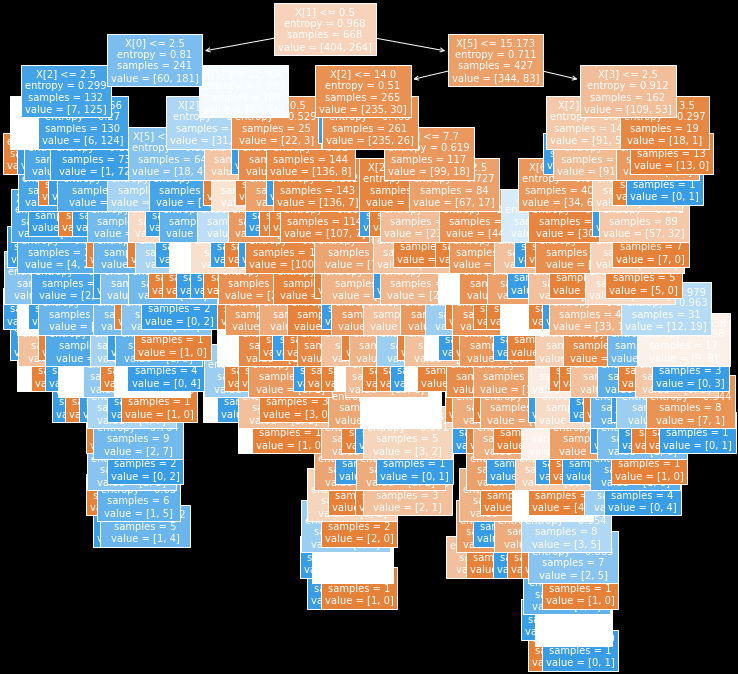

In [ ]:
from sklearn import tree
plt.figure(figsize = (12, 12), facecolor = "k")

tree.plot_tree(full_tree, filled = True, impurity = True, fontsize = 10)
plt.show()

* I also try the "pruned tree" by adjusting the max_depth to only 3

In [ ]:
pruned_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

pruned_tree.fit(X_train, y_train)

print("Depth of Pruned Tree:", pruned_tree.tree_.max_depth)

Depth of Pruned Tree: 3


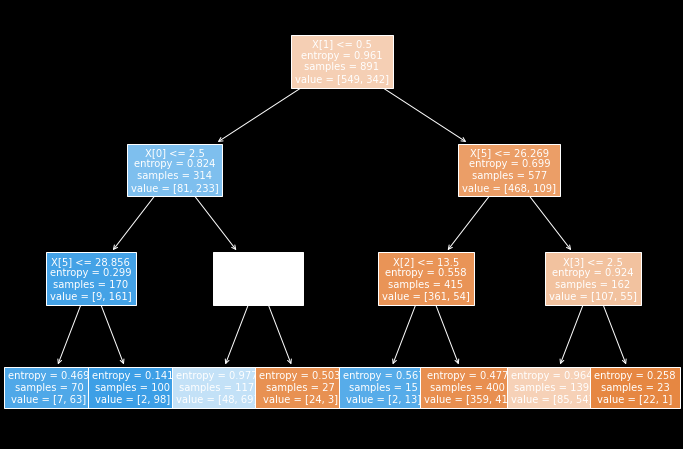

In [ ]:
plt.figure(figsize = (12, 8), facecolor = "k")

tree.plot_tree(pruned_tree, filled = True, impurity = True, fontsize = 10)

plt.show()

* After our full & pruned trees are trained, test them against the test data

In [ ]:
full_pred = full_tree.predict(X_test)
pruned_pred = pruned_tree.predict(X_test)

print("Full Tree Prediction:", full_pred, "\n")
print("Pruned Tree Prediction:", pruned_pred)

Full Tree Prediction: [1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0] 

Pruned Tree Prediction: [1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0]


* Examine their accuracy scores

In [ ]:
print("Accuracy Score:", "\n")
print("Full Tree  :", full_tree.score(X_test, y_test))
print("Pruned Tree:", pruned_tree.score(X_test, y_test))

Accuracy Score: 

Full Tree  : 0.7533632286995515
Pruned Tree: 0.8116591928251121


* Showing in Confusion Matrix

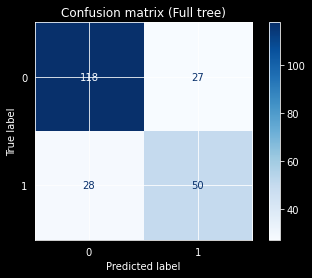

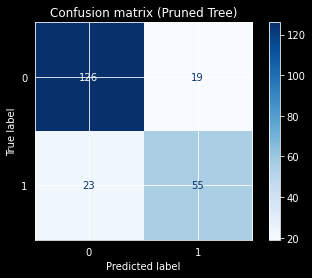

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles = [("Confusion matrix (Full tree)", full_tree), ("Confusion matrix (Pruned Tree)", pruned_tree)]

for title, classifier in titles:
    disp = plot_confusion_matrix(classifier, X_test, y_test, cmap = "Blues", values_format = "")
    disp.ax_.set_title(title)

plt.show()